**applying Neural Networks from scratch (without tensorflow & Keras)**

In [22]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import fetch_openml

In [23]:
mnist = fetch_openml('mnist_784')

In [24]:
X, y = mnist['data'], mnist['target']

In [25]:
nDigits = 10
X = X/255

In [26]:
# applying one Hot notation for y
y_oneHot = np.zeros([y.shape[0], nDigits])

In [27]:
for i in range(y.shape[0]):
    y_oneHot[i,int(y[i])] = 1

In [28]:
y = y_oneHot

In [29]:
# setting the training size and testing size
m = 60000
m_test = X.shape[0] - m

In [30]:
X_train, X_test = X[:m,:], X[m:,:] #dividing the data into different sets --> by slicing notation
y_train, y_test = y[:m,:], y[m:,:]

In [31]:
np.random.seed(1002)

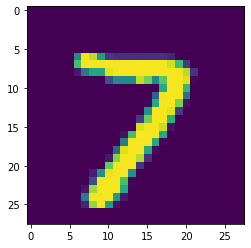

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [35]:
# lets see random input
plt.imshow(X_train[4000,:].reshape(28,28))
plt.show()
print(y_train[4000,:]) #clearly shows that its seven

In [36]:
# defining functions
def sigmoid(x):
    return 1/(1+np.exp(-x))

def ReLu(x):
    return np.maximum(0,x)

def sigmoid_derevative(z):
    return z*(1-z)

def ReLu_derevative(x):
    return (np.sign(x) +1)/2

def CrossEntropyLoss(y, y_hat):
    L_sum = np.sum(np.multiply(y, np.log(y_hat)))
    m = y.shape[1]
    L = -(1/m) * L_sum

    return L

def softmax(y):
    return np.exp(y) / np.sum(np.exp(y), axis=0)

def CE_Softmax_Derivative(output, ideal_output):
    return output - ideal_output

In [37]:
X_dim = X_train.shape[1]
nHidden = 64
lr = 0.3
weight_decay = 0.001

W1 = 0.01*np.random.randn(nHidden, X_dim)
b1 = np.zeros((nHidden, 1))
W2 = 0.01*np.random.randn(nDigits, nHidden)
b2 = np.zeros((nDigits, 1))

Epoch 0 cost:  2.3025926683067466
Epoch 10 cost:  2.2682208146070475
Epoch 20 cost:  2.028370733050025
Epoch 30 cost:  1.387458236816986
Epoch 40 cost:  0.9163128842934588
Epoch 50 cost:  0.7015375494562823
Epoch 60 cost:  0.5915210944462729
Epoch 70 cost:  0.5260159419413941
Epoch 80 cost:  0.48249588766359036
Epoch 90 cost:  0.4519980631585713


<function matplotlib.pyplot.show(*args, **kw)>

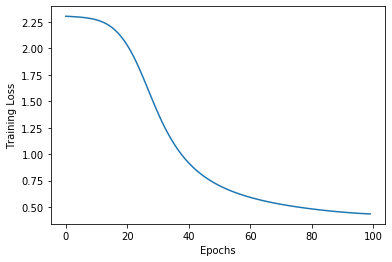

In [40]:
nEpochs = 100
costPlot = np.zeros(nEpochs)

# lets venture into iterations an dsee what happens next

for i in range(nEpochs):
    Z1 = np.matmul(W1, X_train.T) + b1
    A1 = ReLu(Z1)
    Z2 = np.matmul(W2, A1) + b2
    A2 = softmax(Z2)
    
    cost = CrossEntropyLoss(y_train.T, A2)
    costPlot[i] = cost
    
    dZ2 = CE_Softmax_Derivative(A2,y_train.T)
    dW2 = (1./m) * np.matmul(dZ2, A1.T)
    db2 = (1./m) * np.sum(dZ2, axis=1, keepdims=True)

    dA1 = np.matmul(W2.T, dZ2)
    dZ1 = dA1 * ReLu_derevative(Z1)
    dW1 = (1./m) * np.matmul(dZ1, X_train)
    db1 = (1./m) * np.sum(dZ1, axis=1, keepdims=True)

    W2 -= lr * dW2 + weight_decay * W2
    b2 -= lr * db2
    W1 -= lr * dW1 + weight_decay * W1
    b1 -= lr * db1
    
    if (i % 10 == 0):
        print("Epoch", i, "cost: ", cost)

        
plt.plot(costPlot)
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.show